In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
from sklearn.ensemble import BaggingClassifier

titanic_data = pd.read_csv('train.csv')

C:\Users\TTM\AppData\Local\Temp\ipykernel_19348\3611741462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def plot_cf(y_true, y_pred, title):

    cf = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cf, index=['Not Survived', 'Survived'],  columns=[
                         'Not Survived', 'Survived'])
    plt.figure(figsize=(3, 3))
    plt.title(f'{title} Confusion')
    sns.heatmap(df_cm, annot=True, cmap='Blues', cbar=False, fmt=".1f")

In [3]:
def plot_roc_curve(true_y, y_prob, title):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr, color='darkorange', lw=2,)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

## پیش پردازش


In [4]:
label_encoder = LabelEncoder()

titanic_data.fillna(titanic_data.median(numeric_only=True), inplace=True)

titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(
    titanic_data['Embarked'])
titanic_data['Pclass'] = label_encoder.fit_transform(titanic_data['Pclass'])


X = titanic_data.drop(
    columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])
y = titanic_data['Survived']

In [5]:
X_selected = titanic_data[['Pclass', 'Sex', 'Parch', 'Embarked', 'SibSp']]

In [6]:
smote = SMOTE(random_state=42)
X_sampled, y_sampled = smote.fit_resample(X_selected, y)

In [7]:
scaler = StandardScaler()
scaler.fit(X_sampled)
X_sampled = scaler.transform(X_sampled)
y_sampled = y_sampled.to_numpy()

## تقسیم داده ها


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sampled, y_sampled, test_size=0.2, random_state=22)

print(X_selected.shape, X_train.shape, X_test.shape)

(891, 5) (878, 5) (220, 5)


## svm خطی

In [9]:
svm_model = svm.SVC()
svm_bagging_model = BaggingClassifier(base_estimator=svm_model,
                                  n_estimators=100,  # Number of base classifiers
                                  max_samples=0.8,   # Proportion of samples to draw
                                  max_features=1.0,   # Proportion of features to draw
                                  random_state=42)

# Train the Bagging Classifier
svm_bagging_model.fit(X_train, y_train)

C:\Users\TTM\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC(), max_samples=0.8, n_estimators=100,
                  random_state=42)

In [10]:
y_test_pred  = svm_bagging_model.predict(X_test)


print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       115
           1       0.82      0.72      0.77       105

    accuracy                           0.79       220
   macro avg       0.79      0.79      0.79       220
weighted avg       0.79      0.79      0.79       220



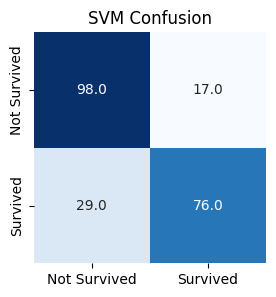

In [11]:
plot_cf(y_test, y_test_pred, 'SVM')

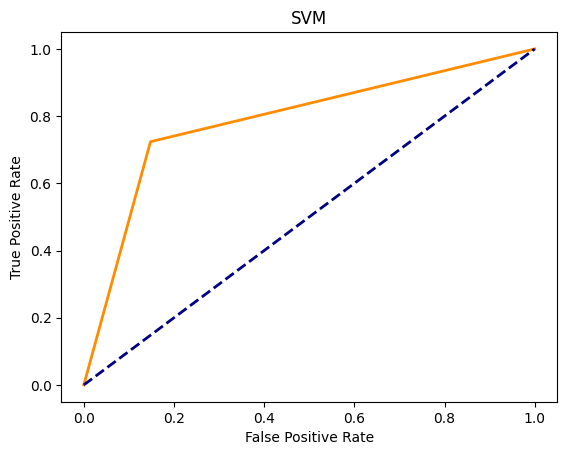

In [12]:
plot_roc_curve(y_test, y_test_pred, 'SVM')

## svm غیرخطی

In [13]:
non_svm_model = svm.SVC(kernel='rbf')
non_svm_bagging_model = BaggingClassifier(base_estimator=svm_model,
                                      n_estimators=100,  # Number of base classifiers
                                      max_samples=0.8,   # Proportion of samples to draw
                                      max_features=1.0,   # Proportion of features to draw
                                      random_state=42)

# Train the Bagging Classifier
non_svm_bagging_model.fit(X_train, y_train)

C:\Users\TTM\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC(), max_samples=0.8, n_estimators=100,
                  random_state=42)

In [14]:
y_test_pred = non_svm_bagging_model.predict(X_test)


print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       115
           1       0.82      0.72      0.77       105

    accuracy                           0.79       220
   macro avg       0.79      0.79      0.79       220
weighted avg       0.79      0.79      0.79       220



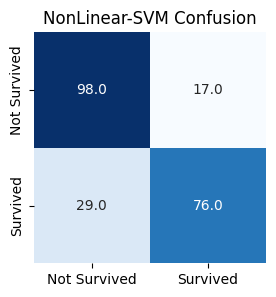

In [15]:
plot_cf(y_test, y_test_pred, 'NonLinear-SVM')

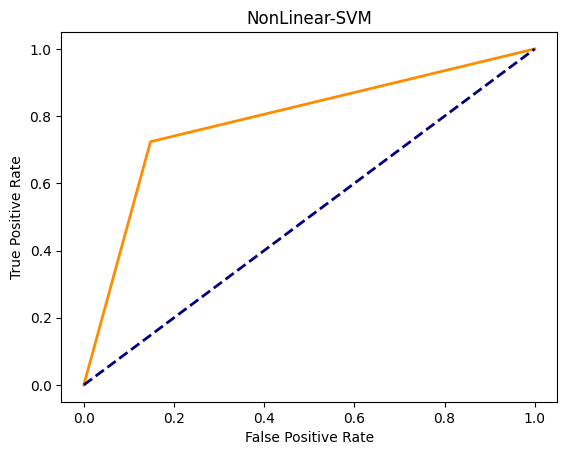

In [16]:
plot_roc_curve(y_test, y_test_pred, 'NonLinear-SVM')

## لوجستیک

In [17]:
log_model = LogisticRegression(max_iter=200)

log_bagging_model = BaggingClassifier(base_estimator=log_model,
                                      n_estimators=100,  # Number of base classifiers
                                      max_samples=0.8,   # Proportion of samples to draw
                                      max_features=1.0,   # Proportion of features to draw
                                      random_state=42)

# Train the Bagging Classifier
log_bagging_model.fit(X_train, y_train)

C:\Users\TTM\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=LogisticRegression(max_iter=200),
                  max_samples=0.8, n_estimators=100, random_state=42)

In [18]:
y_test_pred = log_bagging_model.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       115
           1       0.78      0.72      0.75       105

    accuracy                           0.77       220
   macro avg       0.77      0.77      0.77       220
weighted avg       0.77      0.77      0.77       220



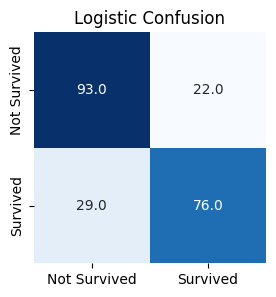

In [19]:
plot_cf(y_test, y_test_pred, 'Logistic')

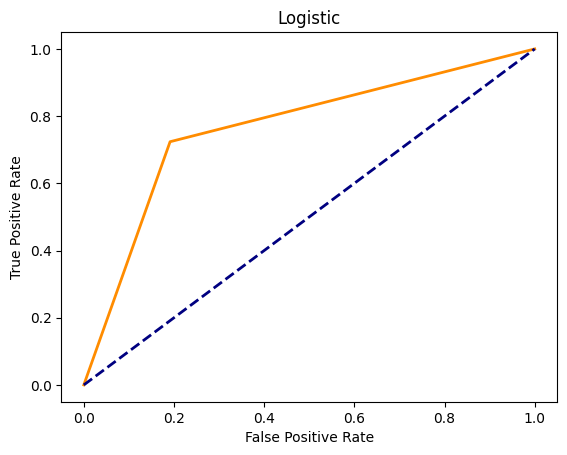

In [20]:
plot_roc_curve(y_test, y_test_pred, 'Logistic')

## آدابوست

In [21]:
ada_model = AdaBoostClassifier(
    n_estimators=100, algorithm="SAMME", random_state=0)
ada_bagging_model = BaggingClassifier(base_estimator=svm_model,
                                      n_estimators=100,  # Number of base classifiers
                                      max_samples=0.8,   # Proportion of samples to draw
                                      max_features=1.0,   # Proportion of features to draw
                                      random_state=42)

# Train the Bagging Classifier
ada_bagging_model.fit(X_train, y_train)

C:\Users\TTM\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC(), max_samples=0.8, n_estimators=100,
                  random_state=42)

In [22]:
y_test_pred = ada_bagging_model.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       115
           1       0.82      0.72      0.77       105

    accuracy                           0.79       220
   macro avg       0.79      0.79      0.79       220
weighted avg       0.79      0.79      0.79       220



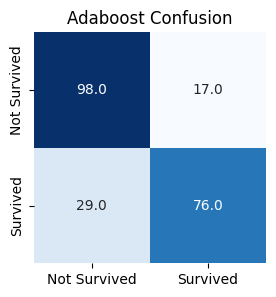

In [23]:
plot_cf(y_test, y_test_pred, 'Adaboost')

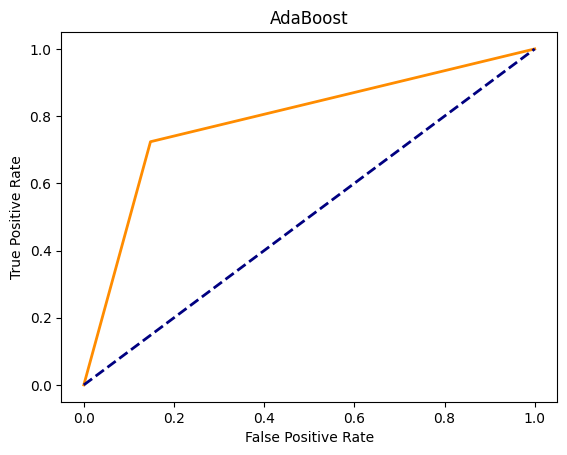

In [24]:
plot_roc_curve(y_test, y_test_pred, 'AdaBoost')